<a href="https://colab.research.google.com/github/nathri/early-diabetes_prediction/blob/main/Mini_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                               ** Mini projet **

Saifeddine elmnasser

# 3 eme annee GE 🏫
# EI ⚡⚡⚡

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [36]:
df = pd.read_csv("diabetes_data.csv" ,sep=";")
df1 = df.copy()
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [37]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

**Dataset Pre-Processing**


In [38]:
df["Gender"]=df["Gender"].replace({"Male":0,"Female":1})
df['class']=df['class'].replace({'Positive':1,'Negative':0})
for col in df.columns:
    if col not in ["Age","Gender","class"]:
        df[col]=df[col].replace({'Yes':1,'No':0})
def age(i):
    for x in range(10,100,10):
        if i < x:
            la = f'{x-10}-{x}'
            return la
            break
df1['Age Group'] = df1['Age'].apply(lambda x:age(x))
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


**Distribution of Data**

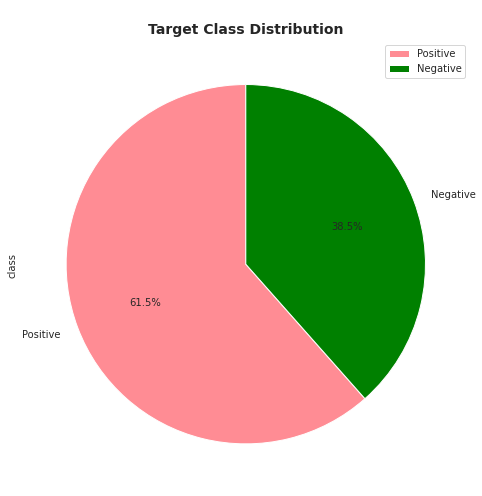

In [39]:
red="#ff8c94"
green="#99ff99"
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
df["class"].value_counts().plot(kind="pie",colors=[red,'green'],legend=True,labels=["Positive","Negative"],
                               startangle=90,autopct='%1.1f%%')
plt.title('\nTarget Class Distribution',fontweight='bold',fontsize=14)
plt.tight_layout()
plt.show()


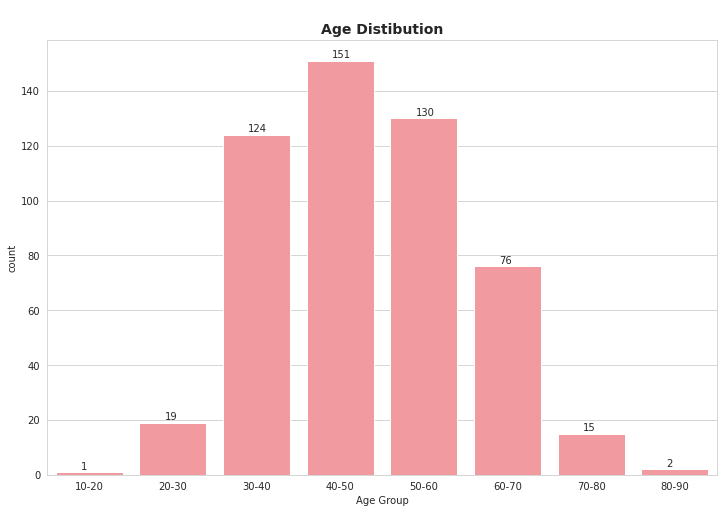

In [40]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Age Group', data=df1, color= red,order=['10-20', '20-30', '30-40', '40-50', 
                                                               '50-60', '60-70', '70-80', '80-90'])
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+.30, p.get_height()+1))

plt.title("\nAge Distibution",fontweight='bold',fontsize=14)
plt.show()

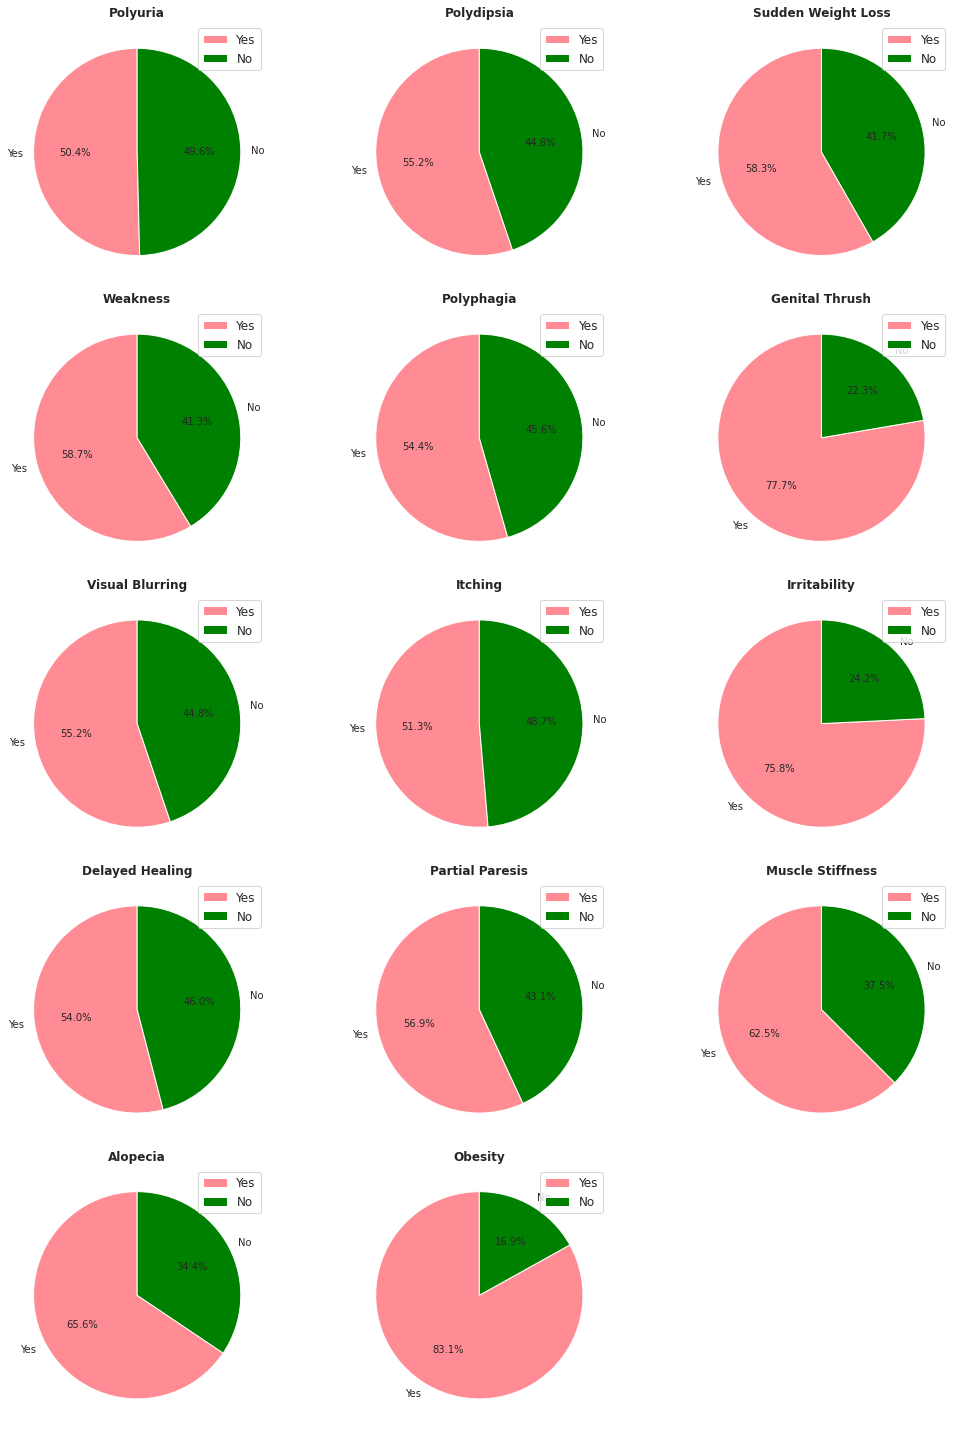

In [41]:
cou = 1
plt.figure(figsize=(15,20))
print('\n\n')
for i in df1.columns:
    if i not in ['class','Age','Gender','Age Group']:
        plt.subplot(5,3,cou)
        plt.title(f'{i.title()}',fontweight='bold',fontsize=14)
        cou += 1
        plt.tight_layout()
        df1[i].value_counts().plot(kind="pie",colors=[red,'green'],legend=True,labels=["Yes","No"],
        startangle=90,autopct='%1.1f%%')
        plt.ylabel('')
        plt.title(f'{i.title()}',fontweight='bold',fontsize=12)
        plt.legend(loc = "upper right",fontsize=12)
plt.tight_layout() 
plt.show()

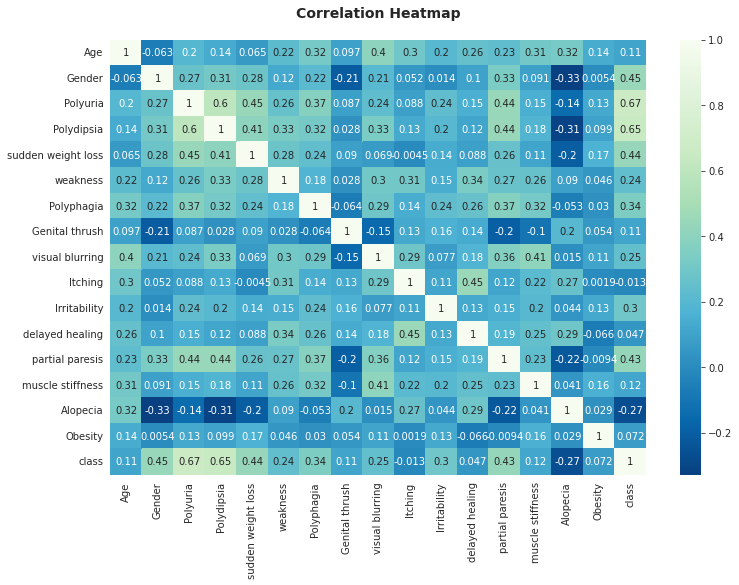

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='GnBu_r')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

**Analysing the age group**


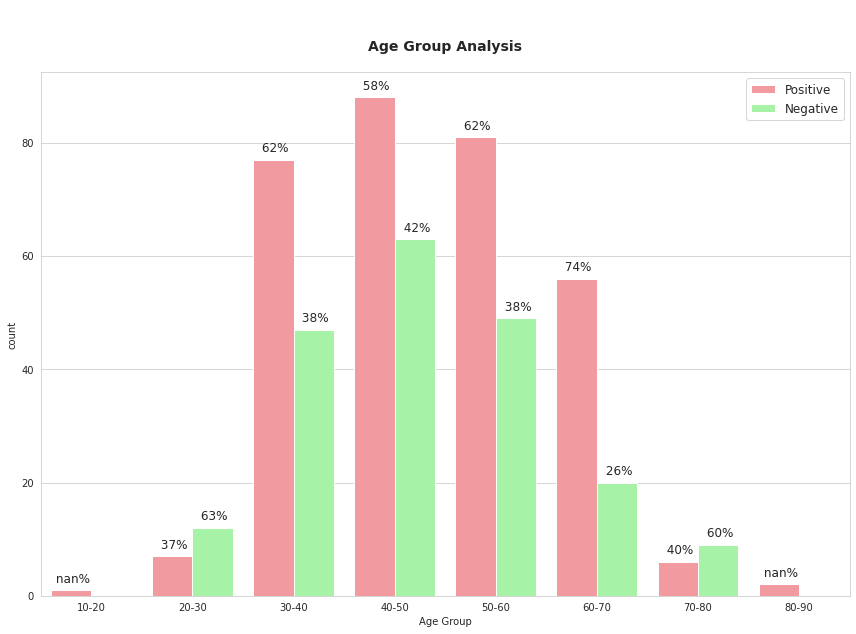

In [43]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="Age Group", data=df1,hue="class",palette=[red,green],order=['10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]
for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r
        l_per = height_l/total
        r_per = height_r/total
        if l_per == np.nan:
            l_per = 100
        if r_per == np.nan:
            r_per = 100
        ax.text(left.get_x() + left.get_width()/2., height_l+2 , ' {0:.0%}'.format(l_per),va='center', ha="center",size=12)
        ax.text(right.get_x() + right.get_width()/2., height_r+2 , ' {0:.0%}'.format(r_per),va='center', ha="center",size=12)
plt.tight_layout()
plt.title(f'\n\nAge Group Analysis\n',fontweight='bold',fontsize=14)
plt.legend(loc = "upper right",fontsize=12)
plt.show()

**Analysis based on Gender**

In [44]:
df1.groupby("Gender")["class"].value_counts().unstack()

class,Negative,Positive
Gender,,
Female,19,173
Male,181,147


**Analysing the symptoms**

In [45]:
ast = df1[df1["class"]=="Positive"]
ast.drop(['Age','Age Group','Gender','class'],axis=1,inplace=True)
ast = ast.apply(pd.Series.value_counts).transpose()
ast['Showed The Symptom']=ast['Yes']/(ast['Yes']+ast['No'])*100
ast["Didn't Show The Symptom"]=ast['No']/(ast['Yes']+ast['No'])*100
ast.drop(['Yes','No'],inplace=True,axis=1)
print('\033[1m'+'\n\t People who were tested positive for Diabetes')
print('**********************************************************')
ast.sort_values(by = 'Showed The Symptom',ascending=False)


	 People who were tested positive for Diabetes
**********************************************************


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Showed The Symptom,Didn't Show The Symptom
Polyuria,75.9375,24.0625
Polydipsia,70.3125,29.6875
weakness,68.1250,31.8750
partial paresis,60.0000,40.0000
Polyphagia,59.0625,40.9375
sudden weight loss,58.7500,41.2500
visual blurring,54.6875,45.3125
Itching,48.1250,51.8750
delayed healing,47.8125,52.1875
muscle stiffness,42.1875,57.8125


**Splitting the dataset into training and testing sets**

In [46]:
X = df.drop("class",axis=1)
Y = df["class"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

**Support Vector Machine**

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
kernels = ['linear','rbf','poly']
for i in kernels:  
    svm_model = SVC(kernel=i,C=2)
    svm_model.fit(X_train,y_train)
    print('For Kernel:',i)
    print('Accuracy is:',svm_model.score(X_test,y_test))

For Kernel: linear
Accuracy is: 0.936046511627907
For Kernel: rbf
Accuracy is: 0.6453488372093024
For Kernel: poly
Accuracy is: 0.6686046511627907


In [48]:
for i in range(0,11):
    svm_model = SVC(kernel='poly',C=2,degree=i)
    svm_model.fit(X_train,y_train)
    print('For Degree:',i)
    print('Accuracy is:',svm_model.score(X_test,y_test))

For Degree: 0
Accuracy is: 0.6453488372093024
For Degree: 1
Accuracy is: 0.6453488372093024
For Degree: 2
Accuracy is: 0.6453488372093024
For Degree: 3
Accuracy is: 0.6686046511627907
For Degree: 4
Accuracy is: 0.7151162790697675
For Degree: 5
Accuracy is: 0.7151162790697675
For Degree: 6
Accuracy is: 0.7151162790697675
For Degree: 7
Accuracy is: 0.7151162790697675
For Degree: 8
Accuracy is: 0.7151162790697675
For Degree: 9
Accuracy is: 0.7267441860465116
For Degree: 10
Accuracy is: 0.7267441860465116


In [49]:
svm_model = SVC(kernel='poly',C=2,degree=7)
svm_model.fit(X_train,y_train)
pred = svm_model.predict(X_test)
svm_model.score(X_test, y_test)

0.7151162790697675

In [50]:
svmscore = svm_model.score(X_test,y_test)
svmcm = confusion_matrix(y_test,pred)
svmcr = classification_report(y_test,pred)
print('Support Vector Machine')
print('**********************')
print('Testscore')
print('---------')
print(svmscore)
print('\n')
print('confusion Matrix')
print('----------------')
print(svmcm)
print('\n')
print('Classification Report')
print('---------------------')
print(svmcr)  

Support Vector Machine
**********************
Testscore
---------
0.7151162790697675


confusion Matrix
----------------
[[ 14  47]
 [  2 109]]


Classification Report
---------------------
              precision    recall  f1-score   support

           0       0.88      0.23      0.36        61
           1       0.70      0.98      0.82       111

    accuracy                           0.72       172
   macro avg       0.79      0.61      0.59       172
weighted avg       0.76      0.72      0.66       172

